# Agentic RAG (Retrieval-Augmented Generation) in Colab

This notebook demonstrates how to build and experiment with **Agentic RAG** systems —  
a more advanced form of traditional RAG that combines **retrieval** with **agent-like reasoning and decision-making**.


## What is Agentic RAG?
- **Traditional RAG**: Enhances LLMs with external knowledge by retrieving documents and feeding them into the model.  
- **Agentic RAG**: Goes beyond retrieval by allowing the model to:
  - Decide **what to retrieve** and **when to retrieve**.  
  - Use **tools and reasoning loops**.  
  - Plan multi-step actions to answer complex queries.  

In [4]:
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings

USER_AGENT environment variable not set, consider setting it to identify your requests.


# langchain Tutorial docs retriever

In [6]:
urls_langchain=[
    'https://python.langchain.com/docs/tutorials/',
    'https://python.langchain.com/docs/tutorials/llm_chain/',
    'https://python.langchain.com/docs/tutorials/retrievers/',
    'https://python.langchain.com/docs/tutorials/classification/',
    'https://python.langchain.com/docs/tutorials/extraction/',
    'https://python.langchain.com/docs/tutorials/chatbot/',
    'https://python.langchain.com/docs/tutorials/agents/',
    'https://python.langchain.com/docs/tutorials/rag/',
    'https://python.langchain.com/docs/tutorials/qa_chat_history/',
    'https://python.langchain.com/docs/tutorials/sql_qa/',
    'https://python.langchain.com/docs/tutorials/summarization/',
    'https://python.langchain.com/docs/tutorials/graph/'
]

In [7]:
docs_langchain=[WebBaseLoader(url).load() for url in urls_langchain]

In [8]:
docs_langchain

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engine

In [9]:
doc_list_langchain=[item for sublist in docs_langchain for item in sublist]

In [10]:
doc_list_langchain

[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineB

In [11]:
len(doc_list_langchain)

12

In [12]:
text_spitter=RecursiveCharacterTextSplitter(
    chunk_size=1000,chunk_overlap=150
)

In [13]:
doc_split_langchain=text_spitter.split_documents(doc_list_langchain)

In [14]:
len(doc_split_langchain)

484

In [15]:
embeddings=OpenAIEmbeddings()

In [16]:
vector_store_langchain=FAISS.from_documents(
    documents=doc_split_langchain,
    embedding=embeddings

)

In [17]:
langchain_retriever=vector_store_langchain.as_retriever()

In [18]:
langchain_retriever.invoke('what is langchain')

[Document(id='16c80f48-94d7-4680-bfdd-c6ce3eaf98bd', metadata={'source': 'https://python.langchain.com/docs/tutorials/classification/', 'title': 'Tagging | 🦜️🔗 LangChain', 'description': 'Open In Colab', 'language': 'en'}, page_content='Tagging | 🦜️🔗 LangChain'),
 Document(id='ddc960f3-d177-4583-b973-59d3d8866494', metadata={'source': 'https://python.langchain.com/docs/tutorials/extraction/', 'title': 'Build an Extraction Chain | 🦜️🔗 LangChain', 'description': 'In this tutorial, we will use tool-calling features of chat models to extract structured information from unstructured text. We will also demonstrate how to use few-shot prompting in this context to improve performance.', 'language': 'en'}, page_content='Build an Extraction Chain | 🦜️🔗 LangChain'),
 Document(id='891c6d71-4879-424c-b442-2ed226c3d5e0', metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read th

# langgraph docs retriever

In [19]:
urls_langgraph=[
    'https://langchain-ai.github.io/langgraph/concepts/why-langgraph/',
    'https://langchain-ai.github.io/langgraph/tutorials/get-started/1-build-basic-chatbot/',
    'https://langchain-ai.github.io/langgraph/tutorials/get-started/2-add-tools/',
    'https://langchain-ai.github.io/langgraph/tutorials/get-started/3-add-memory/',
    'https://langchain-ai.github.io/langgraph/tutorials/get-started/4-human-in-the-loop/',
    'https://langchain-ai.github.io/langgraph/tutorials/get-started/5-customize-state/',
    'https://langchain-ai.github.io/langgraph/tutorials/get-started/6-time-travel/'
]

In [20]:
docs_langgraph=[WebBaseLoader(url).load() for url in urls_langchain]

In [21]:
docs_langgraph


[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engine

In [22]:
doc_list_langgraph=[item for sublist in docs_langgraph for item in sublist]

In [23]:
doc_split_langgraph=text_spitter.split_documents(doc_list_langgraph)

In [24]:
len(doc_split_langgraph)

484

In [25]:
vector_store_langgraph=FAISS.from_documents(
    documents=doc_split_langchain,
    embedding=embeddings

)

In [26]:
langgraph_retriever=vector_store_langgraph.as_retriever()

In [27]:
langgraph_retriever.invoke('what is langgraph')

[Document(id='9aacbcfc-b513-4949-aa86-62627bab6121', metadata={'source': 'https://python.langchain.com/docs/tutorials/rag/', 'title': 'Build a Retrieval Augmented Generation (RAG) App: Part 1 | 🦜️🔗 LangChain', 'description': 'One of the most powerful applications enabled by LLMs is sophisticated question-answering (Q&A) chatbots. These are applications that can answer questions about specific source information. These applications use a technique known as Retrieval Augmented Generation, or RAG.', 'language': 'en'}, page_content='Automatic support for tracing via LangSmith and deployments via LangGraph Platform;\nSupport for persistence, human-in-the-loop, and other features.\nMany use-cases demand RAG in a conversational experience, such that a user can receive context-informed answers via a stateful conversation. As we will see in Part 2 of the tutorial, LangGraph\'s management and persistence of state simplifies these applications enormously.\nUsage\u200b\nLet\'s test our application

In [42]:
### Retriever To Retriever Tools

from langchain.tools.retriever import create_retriever_tool

retriever_tool_langgraph=create_retriever_tool(
    langgraph_retriever,
    "retriever_vector_db_blog",
    "Search and run information about Langgraph"
)

retriever_tool_langchain=create_retriever_tool(
    langchain_retriever,
    "retriever_vector_langchain_blog",
    "Search and run information about Langchain"
)

In [43]:
tools=[retriever_tool_langchain,retriever_tool_langgraph]

# Langgraph Workflow

In [29]:
# state

from typing import TypedDict,Literal,Sequence,Annotated
from langchain_core.messages import BaseMessage,SystemMessage,AIMessage,HumanMessage
from langgraph.graph.message import add_messages

class State(TypedDict):

    messages: Annotated[Sequence[BaseMessage],add_messages]

In [30]:
from langchain_groq import ChatGroq
llm=ChatGroq(model='llama-3.1-8b-instant')

In [34]:
def agent(state:State)->State:
    ''' Given
    the question, it will decide to retrieve using the retriever tool, or simply end
    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
        '''

    print('---Agent Call---')
    model=llm.bind_tools(tools)
    message=state['messages']
    response=model.invoke(message)
    return {
        'messages':[response]
    }

In [35]:
# data model for grading
from pydantic import Field,BaseModel
class grade(BaseModel):
    binary_score:Literal['yes','no']=Field(description='Score yes or no')

In [36]:
llm_yes_no=llm.with_structured_output(grade)

In [37]:
from langchain_core.prompts import PromptTemplate
def classify_documents(state:State)->Literal["generate", "rewrite"]:
    '''
    Determine wheter the document is relavant or not
    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not'''
    
    print('---Check Relavane---')
    prompt=PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    #chain
    chain=prompt | llm_yes_no

    messages = state["messages"] # get messages
    last_message = messages[-1] # get last message

    question = messages[0].content # get user question
    docs = last_message.content # get docs

    scored_result = chain.invoke({"question": question, "context": docs})
    score = scored_result.binary_score
    
    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"
    

In [38]:
# Post-processing
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [ ]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    print(prompt)
    
    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [40]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    response = llm.invoke(msg)
    return {"messages": [response]}

In [44]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


workflow = StateGraph(State)
workflow.add_node('agent',agent)
workflow.add_node('retrieve',ToolNode(tools))
workflow.add_node('generate',generate)
workflow.add_node('rewrite',rewrite)

workflow.add_edge(START,'agent')
workflow.add_conditional_edges(
    'agent',
    tools_condition,
    {
        'tools':'retrieve',
        END:END
    }
)

workflow.add_conditional_edges(
    'retrieve',
    classify_documents
)
workflow.add_edge('generate',END)
workflow.add_edge('rewrite','agent')

graph=workflow.compile()

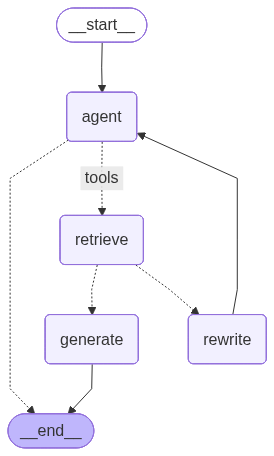

In [45]:
graph

In [46]:
graph.invoke({
    'messages':'what is langgraph'
})

---Agent Call---
---Check Relavane---
---DECISION: DOCS RELEVANT---
---GENERATE---
input_variables=['context', 'question'] input_types={} partial_variables={} metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})]


{'messages': [HumanMessage(content='what is langgraph', additional_kwargs={}, response_metadata={}, id='ab381ae5-0581-4a88-aed1-fae5a629c3d6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'fadg9h1bb', 'function': {'arguments': '{"query":"langgraph"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 309, 'total_tokens': 328, 'completion_time': 0.016815311, 'prompt_time': 0.018632726, 'queue_time': 0.054493503, 'total_time': 0.035448037}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c54ae48ece', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--72655dbf-8b84-4596-8059-c459f3644bb6-0', tool_calls=[{'name': 'retriever_vector_db_blog', 'args': {'query': 'langgraph'}, 'id': 'fadg9h1bb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 309, 'output_tokens': 19, 'total_tokens': 328}),
  ToolMessage(content='LangGraph allows

In [48]:
graph.invoke({
    'messages':'what is MAchine learning'
})

---Agent Call---
---Check Relavane---
---DECISION: DOCS NOT RELEVANT---
no
---TRANSFORM QUERY---
---Agent Call---


{'messages': [HumanMessage(content='what is MAchine learning', additional_kwargs={}, response_metadata={}, id='80fab887-5f28-4911-8dca-1b8705775677'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '2pd42y8c8', 'function': {'arguments': '{"query":"Machine learning definition"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 310, 'total_tokens': 331, 'completion_time': 0.03468298, 'prompt_time': 0.018918745, 'queue_time': 0.413441038, 'total_time': 0.053601725}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_8a13dfab2b', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c3f510d1-7215-4752-8574-b06bbbe9c0b1-0', tool_calls=[{'name': 'retriever_vector_langchain_blog', 'args': {'query': 'Machine learning definition'}, 'id': '2pd42y8c8', 'type': 'tool_call'}], usage_metadata={'input_tokens': 310, 'output_tokens': 21, 'total